In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Means and Covariances

Mean and (co)variance are often useful to describe properties of probability distributions (expected values and spread). We will see in Section 6.6 that there is a useful family of distributions (called the exponential family), where the statistics of the random variable capture all possible information. The concept of the expected value is central to machine learning, and the foundational concepts of probability itself can be derived from the expected value (Whittle, 2000).

---

**Definition 3 (Expected Value).**
The **expected value** of a function $g : \mathbb{R} \to \mathbb{R}$ of a univariate continuous random variable $X \sim p(x)$ is given by:

$$\mathbb{E}_X [g(x)] = \int_{\mathcal{X}} g(x)p(x)dx \quad \text{(6.28)}$$

Correspondingly, the expected value of a function $g$ of a discrete random variable $X \sim p(x)$ is given by:

$$\mathbb{E}_X [g(x)] = \sum_{x \in \mathcal{X}} g(x)p(x) \quad \text{(6.29)}$$

where $\mathcal{X}$ is the set of possible outcomes (the target space) of the random variable $X$. In this section, we consider discrete random variables to have numerical outcomes. This can be seen by observing that the function $g$ takes real numbers as inputs.

**Remark.** We consider multivariate random variables $\mathbf{X}$ as a finite vector of univariate random variables $[X_1, \ldots, X_D]^\top$. For multivariate random variables, we define the expected value element-wise:

$$\mathbb{E}_{\mathbf{X}} [g(\mathbf{x})] = \begin{bmatrix} \mathbb{E}_{X_1} [g(x_1)] \\ \vdots \\ \mathbb{E}_{X_D} [g(x_D)] \end{bmatrix} \in \mathbb{R}^D \quad \text{(6.30)}$$

where the subscript $\mathbb{E}_{X_d}$ indicates that we are taking the expected value with respect to the $d$-th element of the vector $\mathbf{x}$. The expected value of a function of a random variable is sometimes referred to as the law of the unconscious statistician (Casella and Berger, 2002, Section 2.2). $\diamondsuit$

---

Definition 6.3 defines the meaning of the notation $\mathbb{E}_X$ as the operator indicating that we should take the integral with respect to the probability density (for continuous distributions) or the sum over all states (for discrete distributions). The definition of the mean (Definition 6.4), is a special case of the expected value, obtained by choosing $g$ to be the identity function.

---

**Definition 6.4 (Mean).**
The **mean** of a random variable $X$ with states $\mathbf{x} \in \mathbb{R}^D$ is an average and is defined as:

$$\mathbb{E}_{\mathbf{X}} [\mathbf{x}] = \begin{bmatrix} \mathbb{E}_{X_1} [x_1] \\ \vdots \\ \mathbb{E}_{X_D} [x_D] \end{bmatrix} \in \mathbb{R}^D \quad \text{(6.31)}$$

where:

$$\mathbb{E}_{X_d} [x_d] := \begin{cases} \int_{\mathcal{X}} x_d p(x_d)dx_d & \text{if } X \text{ is a continuous random variable} \\ \sum_{x_i \in \mathcal{X}} x_i p(x_d = x_i) & \text{if } X \text{ is a discrete random variable} \end{cases} \quad \text{(6.32)}$$

for $d = 1, \ldots, D$, where the subscript $d$ indicates the corresponding dimension of $x$. The integral and sum are over the states $\mathcal{X}$ of the target space of the random variable $X$.

In one dimension, there are two other intuitive notions of “average”, which are the **median** and the **mode**. The median is the “middle” value if we sort the values, i.e., 50% of the values are greater than the median and 50% are smaller than the median. This idea can be generalized to continuous values by considering the value where the cdf (Definition 6.2) is 0.5. For distributions, which are asymmetric or have long tails, the median provides an estimate of a typical value that is closer to human intuition than the mean value. Furthermore, the median is more robust to outliers than the mean. The generalization of the median to higher dimensions is non-trivial as there is no obvious way to “sort” in more than one dimension (Hallin et al., 2010; Kong and Mizera, 2012). The **mode** is the most frequently occurring value. For a discrete random variable, the mode is defined as the value of $x$ having the highest frequency of occurrence. For a continuous random variable, the mode is defined as a peak in the density $p(x)$. A particular density $p(x)$ may have more than one mode, and furthermore there may be a very large number of modes in high-dimensional distributions. Therefore, finding all the modes of a distribution can be computationally challenging.

### Example 4

Consider the two-dimensional distribution illustrated in Figure 6.4:

$$p(\mathbf{x}) = 0.4 \mathcal{N}\left(\mathbf{x} ; \begin{bmatrix} 10 \\ 1 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 8.4 \end{bmatrix}\right) + 0.6 \mathcal{N}\left(\mathbf{x} ; \begin{bmatrix} 0 \\ 2 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 1.7 \end{bmatrix}\right) \quad \text{(6.33)}$$

We will define the Gaussian distribution $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\sigma}^2)$ in Section 6.5. Also shown is its corresponding marginal distribution in each dimension. Observe that the distribution is bimodal (has two modes), but one of the

In [1]:
# --- Data for the Discrete Random Variable (Number of Heads in 2 coin tosses) ---
# States (outcomes) and their corresponding probabilities (PMF)
states = [0, 1, 2]
pmf = {0: 0.49, 1: 0.42, 2: 0.09}

# Ensure probabilities sum to 1 (for robustness)
total_prob = sum(pmf.values())
if abs(total_prob - 1.0) > 1e-9:
    print(f"Warning: Probabilities do not sum to 1.0. Sum = {total_prob}")

print("--- Data for Discrete Random Variable X ---")
print(f"States: {states}")
print(f"PMF: {pmf}")
print("-" * 50)


# --- 1. Expected Value (E_X[g(x)]) - Definition 6.3 (Discrete) ---
def expected_value(g_function, states, pmf):
    """
    Calculates the expected value of a function g(x) for a discrete random variable X.
    E_X[g(x)] = sum_{x in X} g(x) * p(x)
    """
    sum_of_products = 0.0
    for x_val in states:
        prob = pmf.get(x_val, 0) # Get probability, 0 if state not in pmf
        sum_of_products += g_function(x_val) * prob
    return sum_of_products

print("--- 1. Expected Value of a Function g(x) ---")

# Example g(x) = x (this will be the mean)
def identity_function(x):
    return x

expected_identity = expected_value(identity_function, states, pmf)
print(f"Expected value of g(x) = x (i.e., the mean): {expected_identity:.3f}")

# Example g(x) = x^2
def square_function(x):
    return x**2

expected_square = expected_value(square_function, states, pmf)
print(f"Expected value of g(x) = x^2: {expected_square:.3f}")

# Example g(x) = x + 5
def add_five_function(x):
    return x + 5

expected_add_five = expected_value(add_five_function, states, pmf)
print(f"Expected value of g(x) = x + 5: {expected_add_five:.3f}")
print("-" * 50)


# --- 2. Mean (E_X[x]) - Definition 6.4 (Discrete, Univariate) ---
# This is a special case of expected_value with g(x) = x
def calculate_mean(states, pmf):
    """Calculates the mean of a discrete random variable."""
    return expected_value(identity_function, states, pmf)

print("--- 2. Mean of X (Average) ---")
mean_X = calculate_mean(states, pmf)
print(f"Mean E[X] = {mean_X:.3f}")
print("-" * 50)


# --- 3. Median (Discrete) ---
def calculate_median(states, pmf):
    """
    Calculates the median of a discrete random variable.
    Assumes states are sorted.
    """
    # Create cumulative probabilities
    cumulative_prob = 0.0
    # Sort states based on their numerical value to find the "middle"
    sorted_states = sorted(states)
    
    # Check for median value
    # If there's a state where CDF >= 0.5 for the first time, that's often the median.
    # For discrete, if CDF(x-1) < 0.5 and CDF(x) >= 0.5, then x is the median.
    # If CDF(x) = 0.5, then any value between x and the next value is a median.
    
    # Simple approach: Find the first value where cumulative probability >= 0.5
    current_cumulative_prob = 0.0
    for i, x_val in enumerate(sorted_states):
        current_cumulative_prob += pmf.get(x_val, 0)
        if current_cumulative_prob >= 0.5:
            # Check if it exactly hits 0.5 and there's a next value
            if current_cumulative_prob == 0.5 and i + 1 < len(sorted_states):
                # Median is any value between this state and the next state
                # A common convention is the average of these two values
                return (x_val + sorted_states[i+1]) / 2.0
            else:
                return x_val
    return None # Should not happen if total_prob is 1.0

print("--- 3. Median of X ---")
median_X = calculate_median(states, pmf)
print(f"Median of X = {median_X}")
print("-" * 50)


# --- 4. Mode (Discrete) ---
def calculate_mode(states, pmf):
    """
    Calculates the mode(s) of a discrete random variable.
    Returns a list of modes (can be multimodal).
    """
    if not pmf:
        return []

    max_prob = -1.0
    modes = []

    for x_val in states:
        prob = pmf.get(x_val, 0)
        if prob > max_prob:
            max_prob = prob
            modes = [x_val] # New max, reset modes
        elif prob == max_prob:
            modes.append(x_val) # Same max, add to modes
    return modes

print("--- 4. Mode(s) of X ---")
modes_X = calculate_mode(states, pmf)
print(f"Mode(s) of X = {modes_X}")

# Example of a multimodal distribution (if we had one)
multimodal_states = [1, 2, 3, 4]
multimodal_pmf = {1: 0.3, 2: 0.2, 3: 0.3, 4: 0.2}
modes_multimodal = calculate_mode(multimodal_states, multimodal_pmf)
print(f"Example Multimodal (States={multimodal_states}, PMF={multimodal_pmf}): Mode(s) = {modes_multimodal}")
print("-" * 50)

--- Data for Discrete Random Variable X ---
States: [0, 1, 2]
PMF: {0: 0.49, 1: 0.42, 2: 0.09}
--------------------------------------------------
--- 1. Expected Value of a Function g(x) ---
Expected value of g(x) = x (i.e., the mean): 0.600
Expected value of g(x) = x^2: 0.780
Expected value of g(x) = x + 5: 5.600
--------------------------------------------------
--- 2. Mean of X (Average) ---
Mean E[X] = 0.600
--------------------------------------------------
--- 3. Median of X ---
Median of X = 1
--------------------------------------------------
--- 4. Mode(s) of X ---
Mode(s) of X = [0]
Example Multimodal (States=[1, 2, 3, 4], PMF={1: 0.3, 2: 0.2, 3: 0.3, 4: 0.2}): Mode(s) = [1, 3]
--------------------------------------------------


## Covariance, Variance, and Correlation

The covariance intuitively represents the notion of how dependent random variables are to one another.

### Definition 6.5 (Covariance (Univariate))

The covariance between two univariate random variables $ X, Y \in \mathbb{R} $ is given by the expected product of their deviations from their respective means, i.e.,

$$
\text{Cov}_{X,Y}[x, y] := \mathbb{E}_{X,Y} \left[ (x - \mathbb{E}_X[x])(y - \mathbb{E}_Y[y]) \right]. \quad \text{(6.35)}
$$

### Remark

When the random variable associated with the expectation or covariance is clear by its arguments, the subscript is often suppressed (for example, $ \mathbb{E}_X[x] $ is often written as $ \mathbb{E}[x] $). $ \diamond $

By using the linearity of expectations, the expression in Definition 6.5 can be rewritten as the expected value of the product minus the product of the expected values, i.e.,

$$
\text{Cov}[x, y] = \mathbb{E}[xy] - \mathbb{E}[x]\mathbb{E}[y]. \quad \text{(6.36)}
$$

The covariance of a variable with itself $ \text{Cov}[x, x] $ is called the variance and is denoted by $ V_X[x] $. The square root of the variance is called the standard deviation and is often denoted by $ \sigma(x) $.

The notion of covariance can be generalized to multivariate random variables.

### Definition 6.6 (Covariance (Multivariate))

If we consider two multivariate random variables $ X $ and $ Y $ with states $ x \in \mathbb{R}^D $ and $ y \in \mathbb{R}^E $ respectively, the covariance between $ X $ and $ Y $ is defined as

$$
\text{Cov}[x, y] = \mathbb{E}[x y^\top] - \mathbb{E}[x] \mathbb{E}[y]^\top = \text{Cov}[y, x]^\top \in \mathbb{R}^{D \times E}. \quad \text{(6.37)}
$$

Definition 6.6 can be applied with the same multivariate random variable in both arguments, which results in a useful concept that intuitively captures the “spread” of a random variable. For a multivariate random variable, the variance describes the relation between individual dimensions of the random variable.

### Definition 6.7 (Variance)

The variance of a random variable $ X $ with states $ x \in \mathbb{R}^D $ and a mean vector $ \mu \in \mathbb{R}^D $ is defined as

$$
V_X[x] = \text{Cov}_X[x, x] \quad \text{(6.38a)}
$$

$$
= \mathbb{E}_X \left[ (x - \mu)(x - \mu)^\top \right] = \mathbb{E}_X [x x^\top] - \mathbb{E}_X[x] \mathbb{E}_X[x]^\top \quad \text{(6.38b)}
$$

$$
= \begin{bmatrix}
\text{Cov}[x_1, x_1] & \text{Cov}[x_1, x_2] & \cdots & \text{Cov}[x_1, x_D] \\
\text{Cov}[x_2, x_1] & \text{Cov}[x_2, x_2] & \cdots & \text{Cov}[x_2, x_D] \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}[x_D, x_1] & \cdots & \cdots & \text{Cov}[x_D, x_D]
\end{bmatrix}. \quad \text{(6.38c)}
$$

The $ D \times D $ matrix in (6.38c) is called the covariance matrix of the multivariate random variable $ X $. The covariance matrix is symmetric and positive semidefinite and tells us something about the spread of the data. On its diagonal, the covariance matrix contains the variances of the marginals

$$
p(x_i) = \int p(x_1, \ldots, x_D) \, dx_{\setminus i}, \quad \text{(6.39)}
$$

where “$ \setminus i $” denotes “all variables but $ i $”. The off-diagonal entries are the cross-covariance terms $ \text{Cov}[x_i, x_j] $ for $ i, j = 1, \ldots, D $, $ i \neq j $.

### Remark

In this book, we generally assume that covariance matrices are positive definite to enable better intuition. We therefore do not discuss corner cases that result in positive semidefinite (low-rank) covariance matrices. $ \diamond $

When we want to compare the covariances between different pairs of random variables, it turns out that the variance of each random variable affects the value of the covariance. The normalized version of covariance is called the correlation.

### Definition 6.8 (Correlation)

The correlation between two random variables $ X, Y $ is given by

$$
\text{corr}[x, y] = \frac{\text{Cov}[x, y]}{\sqrt{V[x] V[y]}} \in [-1, 1]. \quad \text{(6.40)}
$$

The correlation matrix is the covariance matrix of standardized random variables, $ x / \sigma(x) $. In other words, each random variable is divided by its standard deviation (the square root of the variance) in the correlation matrix.

The covariance (and correlation) indicate how two random variables are related; see Figure 6.5. Positive correlation $ \text{corr}[x, y] $ means that when $ x $ grows, then $ y $ is also expected to grow. Negative correlation means that as $ x $ increases, then $ y $ decreases.
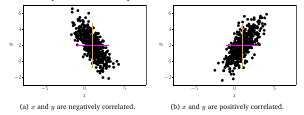

## Fig.5: Two-Dimensional Datasets

Figure 6.5 shows two-dimensional datasets with identical means and variances along each axis (colored lines) but with different covariances.

**(a)** $ x $ and $ y $ are negatively correlated.

**(b)** $ x $ and $ y $ are positively correlated.

In [2]:
import math

# --- Vector and Matrix Operations ---
def vector_add(v1, v2):
    """
    Add two vectors.
    """
    return [v1[i] + v2[i] for i in range(len(v1))]

def vector_subtract(v1, v2):
    """
    Subtract two vectors.
    """
    return [v1[i] - v2[i] for i in range(len(v1))]

def scalar_multiply(scalar, v):
    """
    Multiply a vector by a scalar.
    """
    return [scalar * vi for vi in v]

def dot_product(v1, v2):
    """
    Compute the dot product of two vectors.
    """
    return sum(v1[i] * v2[i] for i in range(len(v1)))

def outer_product(v1, v2):
    """
    Compute the outer product of two vectors (results in a matrix).
    """
    return [[v1[i] * v2[j] for j in range(len(v2))] for i in range(len(v1))]

def matrix_add(M1, M2):
    """
    Add two matrices.
    """
    return [[M1[i][j] + M2[i][j] for j in range(len(M1[0]))] for i in range(len(M1))]

def matrix_subtract(M1, M2):
    """
    Subtract two matrices.
    """
    return [[M1[i][j] - M2[i][j] for j in range(len(M1[0]))] for i in range(len(M1))]

# --- Random Variable Class ---
class RandomVariable:
    def __init__(self, data):
        """
        Initialize with data: list of samples (each sample is a list for multivariate).
        """
        self.data = data
        self.dim = len(data[0]) if data else 0  # Dimension of each sample
        self.n_samples = len(data)

    def expectation(self, func=None):
        """
        Compute the expectation of a function over the data.
        If func is None, compute the mean of the random variable.
        """
        if not self.data:
            return [0] * self.dim

        if func is None:
            # Compute mean: E[x]
            result = [0] * self.dim
            for sample in self.data:
                result = vector_add(result, sample)
            return scalar_multiply(1.0 / self.n_samples, result)
        else:
            # Compute E[func(x)]
            result = 0
            for sample in self.data:
                result += func(sample)
            return result / self.n_samples

# --- Covariance, Variance, and Correlation Functions ---
def covariance_univariate(X, Y):
    """
    Compute univariate covariance (Definition 6.5, Equation 6.35).
    Cov[x, y] = E[(x - E[x])(y - E[y])]
    """
    if len(X.data[0]) != 1 or len(Y.data[0]) != 1:
        raise ValueError("Univariate covariance requires 1D random variables")
    
    # Extract scalar values
    x_data = [sample[0] for sample in X.data]
    y_data = [sample[0] for sample in Y.data]
    
    # Compute means
    mean_x = X.expectation()
    mean_y = Y.expectation()
    
    # Compute E[(x - E[x])(y - E[y])]
    def deviation_product(sample):
        x, y = sample[0][0], sample[1][0]
        return (x - mean_x[0]) * (y - mean_y[0])
    
    paired_data = list(zip(X.data, Y.data))
    cov = sum(deviation_product(pair) for pair in paired_data) / len(paired_data)
    
    # Alternative computation (Equation 6.36): Cov[x, y] = E[xy] - E[x]E[y]
    e_xy = sum(x * y for x, y in zip(x_data, y_data)) / len(x_data)
    alt_cov = e_xy - mean_x[0] * mean_y[0]
    
    return cov, alt_cov

def covariance_multivariate(X, Y):
    """
    Compute multivariate covariance (Definition 6.6, Equation 6.37).
    Cov[x, y] = E[x y^T] - E[x] E[y]^T
    """
    mean_x = X.expectation()
    mean_y = Y.expectation()
    
    # Compute E[x y^T]
    e_xyT = [[0 for _ in range(Y.dim)] for _ in range(X.dim)]
    for i in range(X.n_samples):
        x = X.data[i]
        y = Y.data[i]
        outer = outer_product(x, y)
        e_xyT = matrix_add(e_xyT, outer)
    e_xyT = [[e_xyT[i][j] / X.n_samples for j in range(Y.dim)] for i in range(X.dim)]
    
    # Compute E[x] E[y]^T
    e_x_e_yT = outer_product(mean_x, mean_y)
    
    # Cov[x, y] = E[x y^T] - E[x] E[y]^T
    cov_matrix = matrix_subtract(e_xyT, e_x_e_yT)
    return cov_matrix

def variance(X):
    """
    Compute variance (covariance matrix) of a multivariate random variable (Definition 6.7, Equation 6.38).
    V[x] = Cov[x, x] = E[(x - μ)(x - μ)^T]
    """
    return covariance_multivariate(X, X)

def correlation(X, Y):
    """
    Compute correlation (Definition 6.8, Equation 6.40).
    corr[x, y] = Cov[x, y] / sqrt(V[x] V[y])
    """
    if len(X.data[0]) != 1 or len(Y.data[0]) != 1:
        raise ValueError("Correlation implemented for univariate random variables")
    
    cov, _ = covariance_univariate(X, Y)
    var_x = variance(X)[0][0]
    var_y = variance(Y)[0][0]
    
    if var_x == 0 or var_y == 0:
        return 0  # Avoid division by zero
    return cov / math.sqrt(var_x * var_y)

# --- Demonstration ---
def generate_correlated_data(n_samples, correlation_type):
    """
    Generate 2D data with specified correlation (for Figure 6.5).
    """
    data = []
    if correlation_type == "positive":
        # Positive correlation: y increases with x
        for i in range(n_samples):
            x = i / n_samples * 10 - 5  # x in [-5, 5]
            y = x + (i % 2 - 0.5) * 0.5  # y roughly follows x with small noise
            data.append([x, y])
    else:
        # Negative correlation: y decreases as x increases
        for i in range(n_samples):
            x = i / n_samples * 10 - 5  # x in [-5, 5]
            y = -x + (i % 2 - 0.5) * 0.5  # y roughly follows -x with small noise
            data.append([x, y])
    return data

def demonstrate_covariance_correlation():
    """
    Demonstrate covariance, variance, and correlation (Definitions 6.5–6.8).
    - Univariate covariance (Equations 6.35–6.36)
    - Multivariate variance (Equations 6.38a–c)
    - Correlation (Equation 6.40)
    - Generate datasets as in Figure 6.5
    """
    print("=== Covariance, Variance, and Correlation ===")
    print("Definitions 6.5–6.8\n")

    # Generate datasets (Figure 6.5)
    n_samples = 100
    print("Generating datasets (Figure 6.5):")
    
    # (a) Negatively correlated data
    data_neg = generate_correlated_data(n_samples, "negative")
    X_neg = RandomVariable([[d[0]] for d in data_neg])
    Y_neg = RandomVariable([[d[1]] for d in data_neg])
    XY_neg = RandomVariable(data_neg)
    
    # (b) Positively correlated data
    data_pos = generate_correlated_data(n_samples, "positive")
    X_pos = RandomVariable([[d[0]] for d in data_pos])
    Y_pos = RandomVariable([[d[1]] for d in data_pos])
    XY_pos = RandomVariable(data_pos)

    # Step 1: Univariate Covariance (Equations 6.35–6.36)
    print("Univariate Covariance (Equations 6.35–6.36):")
    cov_neg, alt_cov_neg = covariance_univariate(X_neg, Y_neg)
    print(f"Negative correlation dataset:")
    print(f"Cov[x, y] = {cov_neg:.4f} (direct method)")
    print(f"Cov[x, y] = {alt_cov_neg:.4f} (alternative method, E[xy] - E[x]E[y])")
    
    cov_pos, alt_cov_pos = covariance_univariate(X_pos, Y_pos)
    print(f"\nPositive correlation dataset:")
    print(f"Cov[x, y] = {cov_pos:.4f} (direct method)")
    print(f"Cov[x, y] = {alt_cov_pos:.4f} (alternative method, E[xy] - E[x]E[y])")

    # Step 2: Multivariate Variance (Equations 6.38a–c)
    print("\nMultivariate Variance (Equations 6.38a–c):")
    var_neg = variance(XY_neg)
    print("Negative correlation dataset covariance matrix:")
    for row in var_neg:
        print([round(x, 4) for x in row])
    
    var_pos = variance(XY_pos)
    print("\nPositive correlation dataset covariance matrix:")
    for row in var_pos:
        print([round(x, 4) for x in row])

    # Step 3: Correlation (Equation 6.40)
    print("\nCorrelation (Equation 6.40):")
    corr_neg = correlation(X_neg, Y_neg)
    print(f"Negative correlation dataset: corr[x, y] = {corr_neg:.4f}")
    
    corr_pos = correlation(X_pos, Y_pos)
    print(f"Positive correlation dataset: corr[x, y] = {corr_pos:.4f}")

# --- Main Execution ---
if __name__ == "__main__":
    print("Covariance and Correlation Analysis")
    print("=" * 60)

    # Run demonstration
    demonstrate_covariance_correlation()

    print("\n" + "=" * 60)
    print("Summary of Key Results:")
    print("• Computed univariate covariance using two methods")
    print("• Computed multivariate variance (covariance matrix)")
    print("• Computed correlation, confirming positive/negative relationships")
    print("• Demonstrated concepts with datasets as in Figure 6.5")

Covariance and Correlation Analysis
=== Covariance, Variance, and Correlation ===
Definitions 6.5–6.8

Generating datasets (Figure 6.5):
Univariate Covariance (Equations 6.35–6.36):
Negative correlation dataset:
Cov[x, y] = -8.3200 (direct method)
Cov[x, y] = -8.3200 (alternative method, E[xy] - E[x]E[y])

Positive correlation dataset:
Cov[x, y] = 8.3450 (direct method)
Cov[x, y] = 8.3450 (alternative method, E[xy] - E[x]E[y])

Multivariate Variance (Equations 6.38a–c):
Negative correlation dataset covariance matrix:
[8.3325, -8.32]
[-8.32, 8.37]

Positive correlation dataset covariance matrix:
[8.3325, 8.345]
[8.345, 8.42]

Correlation (Equation 6.40):
Negative correlation dataset: corr[x, y] = -0.9963
Positive correlation dataset: corr[x, y] = 0.9963

Summary of Key Results:
• Computed univariate covariance using two methods
• Computed multivariate variance (covariance matrix)
• Computed correlation, confirming positive/negative relationships
• Demonstrated concepts with datasets as 